In [1]:
## NN Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## Other Dependencies
import pandas as pd
from matplotlib import pyplot as plt

## Initial Data import and pre-processing for Neural Network model

In [43]:
## Import dataset csv

churn_df = pd.read_csv('Resources/clean_churn_db.csv')
attrition_df = pd.read_csv('Resources/BankChurners.csv', usecols=['Attrition_Flag'])

In [3]:
print(f"The amount of Attrited Customers/Existing Customers in the dataset is 1628/8500 or {round(1627/8500 * 100,2)}%")

The amount of Attrited Customers/Existing Customers in the dataset is 1628/8500 or 19.14%


In [4]:
for column in churn_df.columns:
    print(column)

Unnamed: 0
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Gender_F
Gender_M
Education_Level_College
Education_Level_Doctorate
Education_Level_Graduate
Education_Level_High School
Education_Level_Post-Graduate
Education_Level_Uneducated
Education_Level_Unknown
Marital_Status_Divorced
Marital_Status_Married
Marital_Status_Single
Marital_Status_Unknown
Income_Category_$120K +
Income_Category_$40K - $60K
Income_Category_$60K - $80K
Income_Category_$80K - $120K
Income_Category_Less than $40K
Income_Category_Unknown
Card_Category_Blue
Card_Category_Gold
Card_Category_Platinum
Card_Category_Silver


In [5]:
## Define feature values X
X = churn_df.values

## Define target values y
y_df = attrition_df.replace({'Existing Customer':0, 'Attrited Customer':1}).copy()
y = y_df['Attrition_Flag']

In [6]:
## Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

In [7]:
## Instance Scaler
scaler = StandardScaler()

## Fit Scaler
X_scaler = scaler.fit(X_train)

## Scale Data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
len(X_train_scaled[0])

38

## Initial Modelling Attempt
Using all the availible features in the dataset

In [9]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='initial')

## First Hidden Layer + Input
nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu'))

##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))

nn.summary()

Model: "initial"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                975       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Compile and fit
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
initial_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 2s 3ms/step - loss: 0.3938 - accuracy: 0.8304 - val_loss: 0.2625 - val_accuracy: 0.9044
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9145 - val_loss: 0.2009 - val_accuracy: 0.9305
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.9332 - val_loss: 0.1637 - val_accuracy: 0.9415
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1521 - accuracy: 0.9444 - val_loss: 0.1404 - val_accuracy: 0.9475
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9496 - val_loss: 0.1269 - val_accuracy: 0.9518
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9554 - val_loss: 0.1169 - val_accuracy: 0.9573
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9567 - val_loss: 0.1117 - val_accuracy: 0.9581

Epoch 58/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9837 - val_loss: 0.0932 - val_accuracy: 0.9648
Epoch 59/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9831 - val_loss: 0.0927 - val_accuracy: 0.9656
Epoch 60/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9831 - val_loss: 0.0919 - val_accuracy: 0.9688
Epoch 61/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9843 - val_loss: 0.0952 - val_accuracy: 0.9641
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9847 - val_loss: 0.1015 - val_accuracy: 0.9593
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0903 - val_accuracy: 0.9680
Epoch 64/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0916 - val_accuracy:

In [11]:
initial_loss, initial_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.0941 - accuracy: 0.9688 - 103ms/epoch - 1ms/step


In [12]:
## Is this accuracy true?

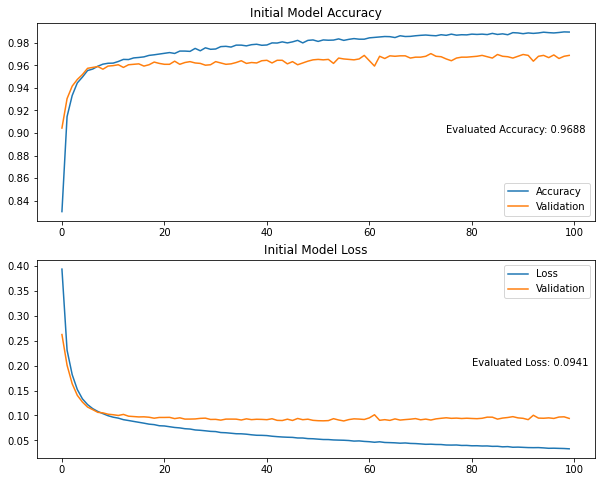

In [37]:
fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].plot(initial_model.history['accuracy'],label='Accuracy')
axs[0].plot(initial_model.history['val_accuracy'],label='Validation')
axs[0].legend()
axs[0].text(75,.9,f'Evaluated Accuracy: {round(initial_accuracy,4)}')
axs[0].set_title("Initial Model Accuracy")

axs[1].plot(initial_model.history['loss'],label='Loss')
axs[1].plot(initial_model.history['val_loss'],label='Validation')
axs[1].legend()
axs[1].text(80,.2,f'Evaluated Loss: {round(initial_loss,4)}')
axs[1].set_title("Initial Model Loss")

plt.show()

Model seems to be overfitted, adjustments to follow.

## Adjusting Model using L2 regularization

In [14]:
from tensorflow.keras import regularizers

In [15]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='l2_reg')

## First Hidden Layer + Input
nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu',
                            kernel_regularizer=regularizers.l2(0.001)))

##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))

nn.summary()

Model: "l2_reg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                975       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [16]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
l2_reg_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 0.4077 - accuracy: 0.8423 - val_loss: 0.3048 - val_accuracy: 0.8969
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.9135 - val_loss: 0.2246 - val_accuracy: 0.9340
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9386 - val_loss: 0.1816 - val_accuracy: 0.9451
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9504 - val_loss: 0.1640 - val_accuracy: 0.9479
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9547 - val_loss: 0.1498 - val_accuracy: 0.9518
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9559 - val_loss: 0.1424 - val_accuracy: 0.9498
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9581 - val_loss: 0.1365 - val_accuracy: 0.9554

Epoch 58/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9825 - val_loss: 0.0962 - val_accuracy: 0.9708
Epoch 59/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9825 - val_loss: 0.0993 - val_accuracy: 0.9704
Epoch 60/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9830 - val_loss: 0.0955 - val_accuracy: 0.9688
Epoch 61/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9810 - val_loss: 0.0938 - val_accuracy: 0.9712
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9826 - val_loss: 0.0946 - val_accuracy: 0.9692
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9833 - val_loss: 0.0949 - val_accuracy: 0.9688
Epoch 64/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9837 - val_loss: 0.0954 - val_accuracy:

In [17]:
l2_loss, l2_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.0925 - accuracy: 0.9720 - 103ms/epoch - 1ms/step


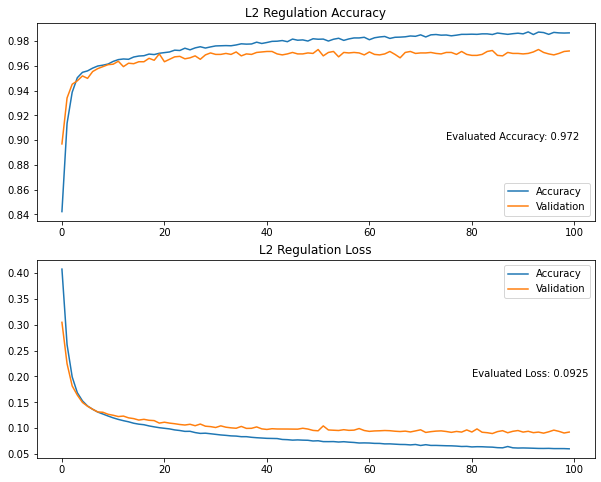

In [47]:
fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].plot(l2_reg_model.history['accuracy'], label="Accuracy")
axs[0].plot(l2_reg_model.history['val_accuracy'], label="Validation")
axs[0].legend()
axs[0].text(75,.9,f'Evaluated Accuracy: {round(l2_accuracy,4)}')
axs[0].set_title("L2 Regulation Accuracy")

axs[1].plot(l2_reg_model.history['loss'], label="Accuracy")
axs[1].plot(l2_reg_model.history['val_loss'], label="Validation")
axs[1].legend()
axs[1].text(80,.2,f'Evaluated Loss: {round(l2_loss,4)}')
axs[1].set_title("L2 Regulation Loss")

plt.show()

In [19]:
l2_loss, l2_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.0925 - accuracy: 0.9720 - 101ms/epoch - 1ms/step


In [20]:
## Looks good at first, but the model still finds out a pattern early and does not adapt to new information

## Adjusting model using Dropout

In [21]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='dropout')

## First Hidden Layer + Input

nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu'))
nn.add(tf.keras.layers.Dropout(.2))

##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))


nn.summary()

Model: "dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                975       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [22]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
dropout_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 0.4424 - accuracy: 0.8008 - val_loss: 0.2787 - val_accuracy: 0.9021
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.8955 - val_loss: 0.2126 - val_accuracy: 0.9285
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9169 - val_loss: 0.1744 - val_accuracy: 0.9408
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9271 - val_loss: 0.1487 - val_accuracy: 0.9491
Epoch 5/100
238/238 [==============================] - 1s 2ms/step - loss: 0.1624 - accuracy: 0.9379 - val_loss: 0.1342 - val_accuracy: 0.9518
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9447 - val_loss: 0.1235 - val_accuracy: 0.9526
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9442 - val_loss: 0.1163 - val_accuracy: 0.9570

Epoch 58/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9726 - val_loss: 0.0741 - val_accuracy: 0.9724
Epoch 59/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0720 - accuracy: 0.9752 - val_loss: 0.0747 - val_accuracy: 0.9731
Epoch 60/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9720 - val_loss: 0.0747 - val_accuracy: 0.9731
Epoch 61/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9729 - val_loss: 0.0738 - val_accuracy: 0.9739
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9730 - val_loss: 0.0742 - val_accuracy: 0.9739
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9745 - val_loss: 0.0740 - val_accuracy: 0.9727
Epoch 64/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9734 - val_loss: 0.0739 - val_accuracy:

In [23]:
dropout_loss, dropout_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.0695 - accuracy: 0.9735 - 101ms/epoch - 1ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


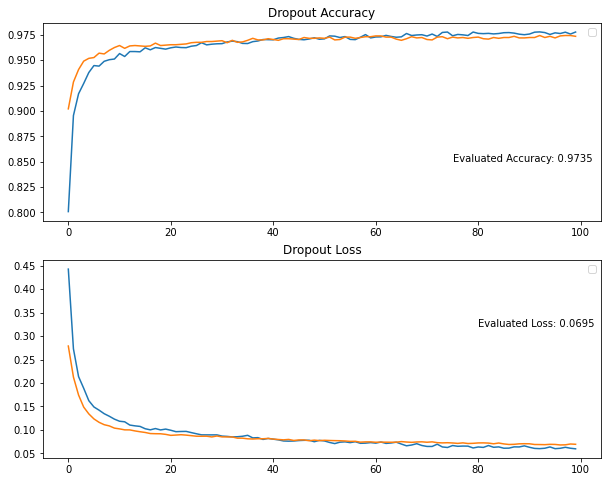

In [24]:
fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].plot(dropout_model.history['accuracy'], label='Accuracy')
axs[0].plot(dropout_model.history['val_accuracy'], label='Validation')
axs[0].legend()
axs[0].text(75,.85,f'Evaluated Accuracy: {round(dropout_accuracy,4)}')
axs[0].set_title("Dropout Accuracy")

axs[1].plot(dropout_model.history['loss'], label='Loss')
axs[1].plot(dropout_model.history['val_loss'], label='Validation')
axs[1].legend()
axs[1].text(80,.32,f'Evaluated Loss: {round(dropout_loss,4)}')
axs[1].set_title("Dropout Loss")

plt.show()

## Using both L2 and Dropout

In [27]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='dropout_and_l2')

## First Hidden Layer + Input
nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu',
                             kernel_regularizer=regularizers.l2(0.001)))
nn.add(tf.keras.layers.Dropout(.2))


##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))


nn.summary()

Model: "dropout_and_l2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                975       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [28]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 
                                                                  tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
dropout_l2_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 2s 4ms/step - loss: 0.5085 - accuracy: 0.7718 - precision: 0.3349 - recall: 0.3965 - val_loss: 0.3312 - val_accuracy: 0.8953 - val_precision: 0.8671 - val_recall: 0.3596
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8977 - precision: 0.8298 - recall: 0.4735 - val_loss: 0.2524 - val_accuracy: 0.9273 - val_precision: 0.8863 - val_recall: 0.5932
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9202 - precision: 0.8471 - recall: 0.6268 - val_loss: 0.2090 - val_accuracy: 0.9392 - val_precision: 0.8927 - val_recall: 0.6772
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9335 - precision: 0.8587 - recall: 0.7119 - val_loss: 0.1789 - val_accuracy: 0.9479 - val_precision: 0.8952 - val_recall: 0.7402
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9422

238/238 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9656 - precision: 0.9121 - recall: 0.8748 - val_loss: 0.0970 - val_accuracy: 0.9696 - val_precision: 0.9222 - val_recall: 0.8714
Epoch 38/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9681 - precision: 0.9163 - recall: 0.8868 - val_loss: 0.0965 - val_accuracy: 0.9700 - val_precision: 0.9111 - val_recall: 0.8871
Epoch 39/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9708 - precision: 0.9252 - recall: 0.8941 - val_loss: 0.0963 - val_accuracy: 0.9704 - val_precision: 0.9180 - val_recall: 0.8819
Epoch 40/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9695 - precision: 0.9253 - recall: 0.8852 - val_loss: 0.0971 - val_accuracy: 0.9680 - val_precision: 0.9167 - val_recall: 0.8661
Epoch 41/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9670 - preci

238/238 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9710 - precision: 0.9261 - recall: 0.8949 - val_loss: 0.0858 - val_accuracy: 0.9735 - val_precision: 0.9290 - val_recall: 0.8924
Epoch 74/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9720 - precision: 0.9344 - recall: 0.8917 - val_loss: 0.0851 - val_accuracy: 0.9743 - val_precision: 0.9365 - val_recall: 0.8898
Epoch 75/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9729 - precision: 0.9283 - recall: 0.9045 - val_loss: 0.0850 - val_accuracy: 0.9731 - val_precision: 0.9264 - val_recall: 0.8924
Epoch 76/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9729 - precision: 0.9326 - recall: 0.8997 - val_loss: 0.0848 - val_accuracy: 0.9735 - val_precision: 0.9266 - val_recall: 0.8950
Epoch 77/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9739 - preci

In [29]:
dropl2_loss, dropl2_accuracy, dropl2_prec, dropl2_recall = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.0866 - accuracy: 0.9716 - precision: 0.9055 - recall: 0.9055 - 109ms/epoch - 1ms/step


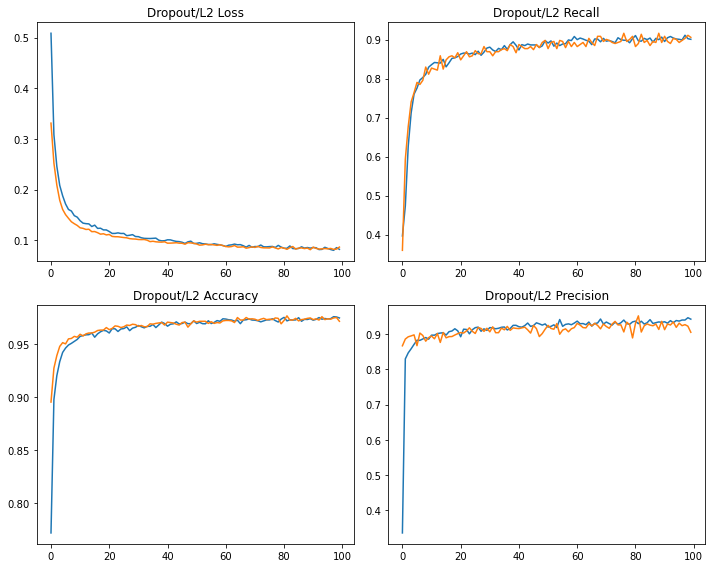

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].plot(dropout_l2_model.history['loss'])
axs[0,0].plot(dropout_l2_model.history['val_loss'])
axs[0,0].set_title("Dropout/L2 Loss")

axs[1,0].plot(dropout_l2_model.history['accuracy'])
axs[1,0].plot(dropout_l2_model.history['val_accuracy'])
axs[1,0].set_title("Dropout/L2 Accuracy")

axs[0,1].plot(dropout_l2_model.history['recall'])
axs[0,1].plot(dropout_l2_model.history['val_recall'])
axs[0,1].set_title("Dropout/L2 Recall")

axs[1,1].plot(dropout_l2_model.history['precision'])
axs[1,1].plot(dropout_l2_model.history['val_precision'])
axs[1,1].set_title("Dropout/L2 Precision")

fig.tight_layout()

In [31]:
dropout_l2_model = pd.DataFrame({
    'Loss': dropout_l2_model.history['loss'],
    'Validation Loss': dropout_l2_model.history['val_loss'],
    'Accuracy': dropout_l2_model.history['accuracy'],
    'Validation Accuracy': dropout_l2_model.history['val_accuracy'],
    
})

d2_l2_model.to_csv('Resources/neural_network/dropout_l2_history.csv',index=False)
d2_l2_model.to_hdf('Resources/neural_network/dropout_l2_model.h5',key='dl2_model')

NameError: name 'd2_l2_model' is not defined